In [1]:
from __future__ import absolute_import,division,print_function,unicode_literals
#importing the necessary libraries and dependencies
import pandas as pd

In [3]:
import sys

# Add the directory containing the Python file to the `sys.path` list
sys.path.append("F:\IMP_DOCUMENT\College material\SEM6\AIProject\Ozone-Prediction-AIProject\Support")

# Import the Python file
import LSTM_Model
import TsPreProcessing

In [4]:
data = pd.read_csv('cleaned_data.csv')
# preprocessing the data
aq_df = TsPreProcessing.pre_processing(data)

In [5]:
# dropping the null values
aq_df.dropna(inplace=True)

In [6]:
aq_df.head()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
To Date,,,,,,,,,,,,,,,,,,
2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31,0.0
2018-11-13,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31,0.0
2018-11-14,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91,0.0
2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54,1.0
2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57,0.0


In [7]:
# define the train and test data
x_train = aq_df[:'2022-01-01']
y_train = x_train['Ozone']
x_test = aq_df['2022-01-01':]
y_test = x_test['Ozone']
print(y_test)


To Date
2022-01-02 00:00:00    14.24
2022-01-03 00:00:00    11.39
2022-01-04 00:00:00    17.99
2022-01-05 00:00:00    14.20
2022-01-06 00:00:00     7.92
                       ...  
2023-03-25 00:00:00    29.68
2023-03-26 00:00:00    54.00
2023-03-27 00:00:00    48.79
2023-03-28 00:00:00    52.68
2023-03-28 11:31:00    26.29
Name: Ozone, Length: 425, dtype: float64


In [8]:
# transforming and normalizing the data
train_norm = TsPreProcessing.Transform_Normalize(x_train['Ozone'])
test_norm = TsPreProcessing.Transform_Normalize(x_test['Ozone'])

[0.37549525]
[0.42997227]
[0.29714739]
[0.403229]
[0.27327655]
Number of null values in norm =  1
[0.11522673]
[0.08801909]
[0.15102625]
[0.11484487]
[0.0548926]
Number of null values in norm =  1


In [9]:
print(train_norm.shape)
print(test_norm.shape)

(975,)
(424,)


Since this is a time series data, we should be predicting the values after looking at a set of values rather than just a single value like we usually do. This takes into account the correlation between the data points and the timestamps. Because the neighbours should be considered for how the values change over time. Let's define a function to do this.

The below function called split_sequence splits the sequence into sets of n values. This n is given as n_steps (step_size). For example, if n=3, we split the sequence in groups of 3. We create 2 empty lists and append the split sequences.

Here the number of features = 1 as we will be predicting a single value. Let's reshape the split sequences into the format of number of rows, number of columns. (shape[0], shape[1]). In the output, we can see that groups of 3 since n_steps = 3 have been obtained.


In [10]:
n_steps = 15 #number of steps to look back
X_split_train, y_split_train = TsPreProcessing.split_sequence(train_norm, n_steps)
for i in range(len(X_split_train)):
    print(X_split_train[i], y_split_train[i])
n_features = 1 #number of features (in this case it is just the number of columns in the dataframe)
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

[0.37549525 0.42997227 0.29714739 0.403229   0.27327655 0.45542789
 0.32220681 0.45800317 0.50079239 0.37143423 0.33963946 0.32151347
 0.28308241 0.14996038 0.23821315] 0.2025554675118859
[0.42997227 0.29714739 0.403229   0.27327655 0.45542789 0.32220681
 0.45800317 0.50079239 0.37143423 0.33963946 0.32151347 0.28308241
 0.14996038 0.23821315 0.20255547] 0.17224643423137875
[0.29714739 0.403229   0.27327655 0.45542789 0.32220681 0.45800317
 0.50079239 0.37143423 0.33963946 0.32151347 0.28308241 0.14996038
 0.23821315 0.20255547 0.17224643] 0.24445324881141045
[0.403229   0.27327655 0.45542789 0.32220681 0.45800317 0.50079239
 0.37143423 0.33963946 0.32151347 0.28308241 0.14996038 0.23821315
 0.20255547 0.17224643 0.24445325] 0.2099841521394612
[0.27327655 0.45542789 0.32220681 0.45800317 0.50079239 0.37143423
 0.33963946 0.32151347 0.28308241 0.14996038 0.23821315 0.20255547
 0.17224643 0.24445325 0.20998415] 0.16541204437400953
[0.45542789 0.32220681 0.45800317 0.50079239 0.37143423 0

In [11]:
X_split_test, y_split_test = TsPreProcessing.split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))


[0.11522673 0.08801909 0.15102625 0.11484487 0.0548926  0.07885442
 0.08267303 0.21804296 0.11312649 0.06071599 0.05966587 0.03866348
 0.07646778 0.04286396 0.06090692] 0.04668257756563246
[0.08801909 0.15102625 0.11484487 0.0548926  0.07885442 0.08267303
 0.21804296 0.11312649 0.06071599 0.05966587 0.03866348 0.07646778
 0.04286396 0.06090692 0.04668258] 0.07312649164677805
[0.15102625 0.11484487 0.0548926  0.07885442 0.08267303 0.21804296
 0.11312649 0.06071599 0.05966587 0.03866348 0.07646778 0.04286396
 0.06090692 0.04668258 0.07312649] 0.07723150357995227
[0.11484487 0.0548926  0.07885442 0.08267303 0.21804296 0.11312649
 0.06071599 0.05966587 0.03866348 0.07646778 0.04286396 0.06090692
 0.04668258 0.07312649 0.0772315 ] 0.201909307875895
[0.0548926  0.07885442 0.08267303 0.21804296 0.11312649 0.06071599
 0.05966587 0.03866348 0.07646778 0.04286396 0.06090692 0.04668258
 0.07312649 0.0772315  0.20190931] 0.082673031026253


In [12]:
# import the fucntion for Support folder from the same directory
from LSTM_Model import build_lstm_model
n_steps = 15
n_features = 1
input_shape = (n_steps, n_features)
num_lstm_units = 64
num_hidden_layers = 2
num_units_hidden_layers = 32
activation_function = 'tanh'
dropout_rate = 0.2

model = build_lstm_model(input_shape, num_lstm_units, num_hidden_layers, num_units_hidden_layers, dropout_rate)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
#  fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, verbose = 1)


Epoch 1/50
30/30 [==============================] - 2s 15ms/step - loss: 0.0510 - mae: 0.1719 - val_loss: 0.0169 - val_mae: 0.1069
Epoch 2/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0217 - mae: 0.1125 - val_loss: 0.0125 - val_mae: 0.0807
Epoch 3/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0189 - mae: 0.1016 - val_loss: 0.0105 - val_mae: 0.0736
Epoch 4/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0176 - mae: 0.0971 - val_loss: 0.0115 - val_mae: 0.0737
Epoch 5/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0159 - mae: 0.0916 - val_loss: 0.0104 - val_mae: 0.0692
Epoch 6/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0148 - mae: 0.0890 - val_loss: 0.0100 - val_mae: 0.0682
Epoch 7/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0140 - mae: 0.0877 - val_loss: 0.0101 - val_mae: 0.0707
Epoch 8/50
30/30 [==============================] - 0s 11ms/step - loss: 0.0128 - mae: 0.

In [14]:
yhat = model.predict(X_split_test)

13/13 [==============================] - 0s 3ms/step


In [15]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)
rmse = sqrt(mse)
print('RMSE: %.5f' % rmse)
r2 = r2_score(y_split_test, yhat)
print('R2: %.5f' % r2)

MSE: 0.00992
RMSE: 0.09959
R2: 0.63336


In [16]:
import matplotlib.pyplot as plt

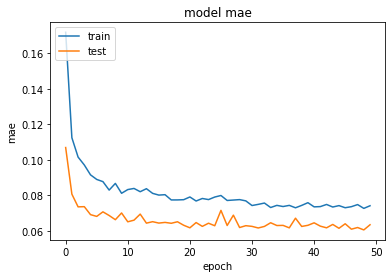

In [17]:
# summarize history for accuracy
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

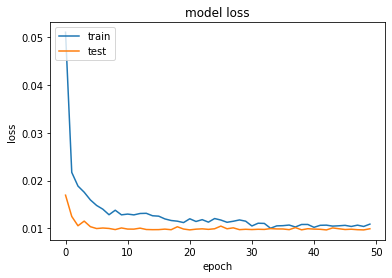

In [18]:
# Above, accuracy increase a lot in the last few epochs. Below, the loss gradually decrease. These are positive signs that our model is doing very good.

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

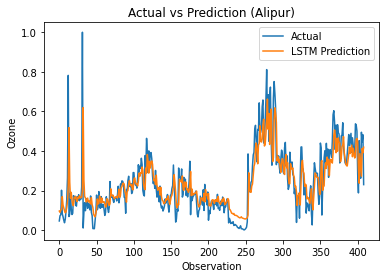

In [21]:
# plot yhat and y_split_test
plt.title('Actual vs Prediction (Alipur)')
plt.plot(y_split_test, label='Actual')
plt.plot(yhat, label='LSTM Prediction')
plt.xlabel('Observation')
plt.ylabel('Ozone')
plt.legend()

# Bidirectional LSTM

In [22]:
from LSTM_Model import build_bidirectional_lstm_model
from keras.optimizers import Adam

n_steps = 10
n_features = 5
input_shape = (n_steps, n_features)
num_lstm_units = 64
num_dense_units = 50
dense_activation_function = 'tanh'
optimizer = Adam(lr=0.001)

B_model = build_bidirectional_lstm_model(input_shape, num_lstm_units, num_dense_units, dense_activation_function, optimizer)

#  fit model
hist = B_model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, verbose = 1)


Epoch 1/50


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 2s 23ms/step - loss: 0.0304 - mae: 0.1309 - val_loss: 0.0126 - val_mae: 0.0808
Epoch 2/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0146 - mae: 0.0888 - val_loss: 0.0112 - val_mae: 0.0728
Epoch 3/50
30/30 [==============================] - 0s 9ms/step - loss: 0.0132 - mae: 0.0828 - val_loss: 0.0104 - val_mae: 0.0726
Epoch 4/50
30/30 [==============================] - 0s 12ms/step - loss: 0.0120 - mae: 0.0791 - val_loss: 0.0104 - val_mae: 0.0688
Epoch 5/50
30/30 [==============================] - 0s 9ms/step - loss: 0.0117 - mae: 0.0786 - val_loss: 0.0098 - val_mae: 0.0668
Epoch 6/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0117 - mae: 0.0786 - val_loss: 0.0098 - val_mae: 0.0652
Epoch 7/50
30/30 [==============================] - 0s 9ms/step - loss: 0.0112 - mae: 0.0759 - val_loss: 0.0103 - val_mae: 0.0662
Epoch 8/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0110 - mae: 0.0757 - val_

In [23]:
B_yhat = B_model.predict(X_split_test)
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_split_test, B_yhat)
print('MSE: %.5f' % mse)
rmse = sqrt(mse)
print('RMSE: %.5f' % rmse)
# R2 score
r2 = r2_score(y_split_test, B_yhat)
print('R2: %.5f' % r2)

13/13 [==============================] - 0s 3ms/step
MSE: 0.00961
RMSE: 0.09802
R2: 0.64478


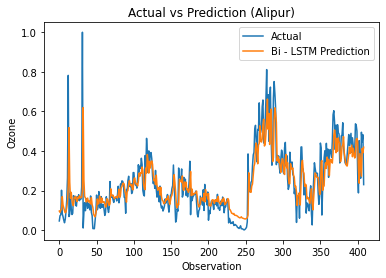

In [24]:
# plot yhat and y_split_test
plt.title('Actual vs Prediction (Alipur)')
plt.plot(y_split_test, label='Actual')
plt.plot(yhat, label='Bi - LSTM Prediction')
plt.xlabel('Observation')
plt.ylabel('Ozone')
plt.legend()